# Search: Solving a Maze Using a Goal-based Agent

## Instructions

Total Points: Undergrads 100 / Graduate students 110

Complete this notebook. Use the provided notebook cells and insert additional code and markdown cells as needed. Submit the completely rendered notebook as a PDF file. 


## Introduction

The agent has a map of the maze it is in and the environment is assumed to be **deterministic, discrete, and known.** The agent must use the map to plan a path through the maze from the starting location $S$ to the goal location $G$.  This is a planing exercise for a goal-based agent, so you do not need to implement an environment, just use the map to search for a path. Once the plan is made, the agent in a deterministic environment (i.e., the transition function is deterministic with the outcome of each state/action pair fixed and no randomness) can just follow the path and does not need to care about the percepts.
This is also called an **[open-loop system](https://en.wikipedia.org/wiki/Open-loop_controller).**
The execution phase is trivial and we do not implement it in this exercise.

Tree search algorithm implementations that you find online and used in general algorithms courses have often a different aim. These algorithms assume that you already have a tree in memory. We are interested in dynamically creating a search tree with the aim of finding a good/the best path from the root noteto the goal state. Follow the pseudo code presented in the text book (and replicated in the slides) closely. Ideally, we would like to search only a small part of the maze, i.e., create a search tree with as few nodes as possible. 

Several mazes for this exercise are stored as text files. Here is the small example maze:

In [28]:
with open("small_maze.txt", "r") as f:
    maze_str = f.read()
print(maze_str)

XXXXXXXXXXXXXXXXXXXXXX
X XX        X X      X
X    XXXXXX X XXXXXX X
XXXXXX     S  X      X
X    X XXXXXX XX XXXXX
X XXXX X         X   X
X        XXX XXX   X X
XXXXXXXXXX    XXXXXX X
XG         XX        X
XXXXXXXXXXXXXXXXXXXXXX



## Parsing and pretty printing the maze

The maze can also be displayed in color using code in the module [maze_helper.py](maze_helper.py). The code parses the string representing the maze and converts it into a `numpy` 2d array which you can use in your implementation. Position are represented as a 2-tuple of the form `(row, col)`. 

In [2]:
# import maze_helper as mh

# maze = mh.parse_maze(maze_str)

# look at a position in the maze by subsetting the 2d array
print("Position(0,0):", maze[0, 0])

# there is also a helper function called `look(maze, pos)` available
# which uses a 2-tuple for the position.
print("Position(8,1):", mh.look(maze, (8, 1)))

Position(0,0): X
Position(8,1): X


A helper function to visualize the maze is also available.

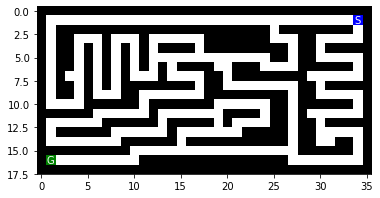

In [3]:
import maze_helper as mh

# f = open("small_maze.txt", "r")
f = open("medium_maze.txt", "r")
# f = open("large_maze.txt", "r")    # this has only one solution!
#f = open("open_maze.txt", "r")
#f = open("empty_maze.txt", "r")
#f = open("empty_2_maze.txt", "r")
#f = open("wall_maze.txt", "r")
#f = open("loops_maze.txt", "r")
#f = open("L_maze.txt", "r")

maze_str = f.read()
maze = mh.parse_maze(maze_str)

mh.show_maze(maze)

__Note:__ The mazes above contains cycles and therefore the state space may not form proper trees unless cycles are prevented. Therfore, you will need to deal with cycle detection in your code.

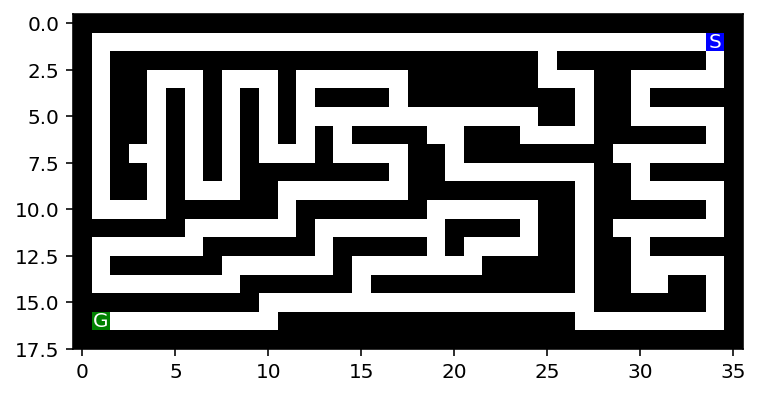

In [4]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
# use higher resolution images in notebook

mh.show_maze(maze)

Find the position of the start and the goal using the helper function `find_pos()`

In [4]:
print("Start location:", mh.find_pos(maze))
print("Goal location:", mh.find_pos(maze, what = "G"))

Start location: (35, 35)
Goal location: (35, 1)


Helper function documentation.

In [5]:
help(mh)

Help on module maze_helper:

NAME
    maze_helper

DESCRIPTION
    Code for the Maze Assignment by Michael Hahsler
    Usage: 
        import maze_helper as mh
        mh.show_some_mazes()

FUNCTIONS
    find_pos(maze, what='S')
        Find start/goal in a maze and returns the first one. 
        Caution: there is no error checking!
        
        Parameters:
        maze: a array with characters prodced by parse_maze()
        what: the letter to be found ('S' for start and 'G' for goal)
        
        Returns:
        a tupple (x, y) for the found position.
    
    look(maze, pos)
        Look at the label of a square with the position as an array of the form (x, y).
    
    parse_maze(maze_str)
        Convert a maze as a string into a 2d numpy array
    
    show_maze(maze, fontsize=10)
        Display a (parsed) maze as an image.
    
    welcome()
        Welcome message.

FILE
    /home/jovyan/CS7320-AI/Search/maze_helper.py




## Tree structure

Here is an implementation of the basic node structure for the search algorithms (see Fig 3.7 on page 73). I have added a method that extracts the path from the root node to the current node. It can be used to get the path when the search is completed.

In [5]:
class Node:
    def __init__(self, pos, parent, action, cost, heuristic = 0):
        self.pos = tuple(pos)    # the state; positions are (row,col)
        self.parent = parent     # reference to parent node. None means root node.
        self.action = action     # action used in the transition function (root node has None)
        self.cost = cost         # for uniform cost this is the depth. It is also g(n) for A* search
        self.heuristic = heuristic

    def __str__(self):
        return f"Node - pos = {self.pos}; action = {self.action}; cost = {self.cost}"
    
    def get_path_from_root(self):
        """returns nodes on the path from the root to the current node."""
        node = self
        path = [node]
    
        while not node.parent is None:
            node = node.parent
            path.append(node)
        
        path.reverse()
        
        return(path)

If needed, then you can add more fields to the class like the heuristic value $h(n)$ or $f(n)$.

Examples for how to create and use a tree and information on memory management can be found [here](../Python_Code_Examples/trees.ipynb).

# Tasks

The goal is to:

1. Implement the following search algorithms for solving different mazes:

    - Breadth-first search (BFS)
    - Depth-first search (DFS)
    - Greedy best-first search (GBFS)
    - A* search

2. Run each of the above algorithms on the 
    - [small maze](small_maze.txt), 
    - [medium maze](medium_maze.txt), 
    - [large maze](large_maze.txt), 
    - [open maze](open_maze.txt),
    - [wall maze](wall_maze.txt),
    - [loops maze](loops_maze.txt),
    - [empty maze](empty_maze.txt), and
    - [empty 2_maze](empty_2_maze.txt).
    
3. For each problem instance and each search algorithm, report the following in a table:

    - The solution and its path cost
    - Total number of nodes expanded
    - Maximum tree depth
    - Maximum size of the frontier

4. Display each solution by marking every maze square (or state) visited and the squares on the final path.

## General [10 Points]

1. Make sure that you use the latest version of this notebook. Sync your forked repository and pull the latest revision. 
2. Your implementation can use libraries like math, numpy, scipy, but not libraries that implement inteligent agents or complete search algorithms. Try to keep the code simple! In this course, we want to learn about the algorithms and we often do not need to use object-oriented design.
3. You notebook needs to be formated professionally. 
    - Add additional markdown blocks for your description, comments in the code, add tables and use mathplotlib to produce charts where appropriate
    - Do not show debugging output or include an excessive amount of output.
    - Check that your PDF file is readable. For example, long lines are cut off in the PDF file. You don't have control over page breaks, so do not worry about these.
4. Document your code. Add a short discussion of how your implementation works and your design choices.

## Task 1: Defining the search problem and determining the problem size [10 Points]

Define the components of the search problem:

* Initial state
* Actions
* Transition model
* Goal state
* Path cost

Use verbal descriptions, variables and equations as appropriate. 

*Note:* You can swich the next block from code to Markdown and use formating.

**Initial State**: starting node in the maze, the first frontier

**Actions**: push the frontier(s) to the next square in the maze: East, West, North, South

**Transition Model**: If a frontier is pushed to an adjacent square, it establishes a new frontier. If there is a wall, then the agent cannot transition to that square or the subsequent squares separated by said wall in that specific direction

**Goal State**: goal node in the maze

**Path Cost**: Total sum of edge cost between the location of the frontier and the starting state.

Give some estimates for the problem size:

* $n$: state space size
* $d$: depth of the optimal solution
* $m$: maximum depth of tree
* $b$: maximum branching factor

Describe how you would determin these values for a given maze.

**n**: sum of  every discretized grid cell that is a white cell (maneuvarable space) i.e. sum of every legal position that a robot can be in within the maze

**d**: optimal solution will be the minimum number of actions needed to be taken to reach the goal state. So in this exercise, the depth of the optimal solution will be the shortest path available to go from initial state to goal state. In other words, depth of the optimal solution is the minimum number of states that need to be explored to reach the goal state.

**m**: the longest sequence of states that does not result in goal state. m can be infinite if cycles are not prevented.

**b**: the state with the most branches or neighbors will determine the maximum branching factor. In the example of a maze, if a certain grid position has 3 different paths diverging from it, it will have a branching factor of 3.

## Task 2: Uninformed search: Breadth-first and depth-first [40 Points]

Implement these search strategies. Follow the pseudocode in the textbook/slides. You can use the tree structure shown above to extract the final path from your solution.

__Notes:__
* You can find maze solving implementations online that use the map to store information. While this is an effective idea for this two-dimensional navigation problem, it typically cannot be used for other search problems. Therefore, follow the textbook and only store information in the tree created during search, and use the `reached` and `frontier` data structures.
* DSF can be implemented using the BFS tree search algorithm and simply changing the order in which the frontier is expanded (this is equivalent to best-first search with path length as the criterion to expand the next node). However, to take advantage of the significantly smaller memory footprint of DFS, you need to implement DFS in a different way without a `reached` data structure and by releasing the memory for nodes that are not needed anymore. 
* If DFS does not use a `reached` data structure, then its cycle checking abilities are limited. Remember, that DSF is incomplete if cycles cannot be prevented. You will see in your experiments that open spaces are a problem.

In [6]:
import operator
# expand function to be used in tree search algorithms
def expand(problem, node):
    # define current state for node
    x, y = node.pos
    
    # declare new nodes
    child_nodes = []
    
    # tally the available actions
    actions = {'N': (0,0), 'S': (0,0), 'W': (0,0), 'E': (0,0)}
    if problem[x - 1, y] != 'X':
        actions['N'] = (-1, 0)
    if problem[x + 1, y] != 'X':
        actions['S'] = (1, 0)
    if problem[x, y - 1] != 'X':
        actions['W'] = (0, -1)
    if problem[x, y + 1] != 'X':
        actions['E'] = (0, 1)
    
    for dir in actions:
        x_p = x + actions[dir][0]
        y_p = y + actions[dir][1]
        # if (x_p, y_p) == (x, y), the frontier is stuck although this should never happen
        
        if x_p != x or y_p != y:    # this code translates to if the agent can move in either direction
            # print("gets here")
            cost = node.cost + 1
            new_node = Node(pos = (x_p, y_p), parent = node, action = dir, cost = cost)
            child_nodes.append(new_node)    
    return child_nodes

In [15]:
# Breadth First Search
def breadth_first_search(problem, verbose = False):
    root = Node(pos = mh.find_pos(problem), parent = None, action = None, cost = 0)
    if mh.find_pos(problem, what = "G") == root.pos:
        return root
    frontier_queue = []
    reached_dict = {}
    
    # for comparison data
    global num_nodes_expanded
    global max_tree_depth
    global max_nodes_in_mem
    global max_frontier_size
    
    frontier_queue.append(root)
    reached_dict[root.pos] = True
    
    max_tree_depth += 1    
    while frontier_queue:
        node = frontier_queue.pop(0)
        # print("frontier: ", node)
        if node.pos != mh.find_pos(problem):
            problem[node.pos[0], node.pos[1]] = '.'
        
        frontier_helper = 0
        memory_helper = len(frontier_queue)
        for child in expand(problem, node):
            num_nodes_expanded += 1
            memory_helper += 1
            frontier_helper += 1
            
            s = child.pos
            # print("location of child: ", s)
            if s == mh.find_pos(problem, what = 'G'):
                if verbose:
                    mh.show_maze(problem)
                return child
            if not s in reached_dict:
                reached_dict[s] = True
                frontier_queue.append(child)
                problem[s[0], s[1]] = 'F'
            else:
                child = None
        node = None
        
        max_tree_depth += 1
        if frontier_helper > max_frontier_size:
            max_frontier_size = frontier_helper
        if memory_helper > max_nodes_in_mem :
            max_nodes_in_mem = memory_helper
        
    if verbose:
        mh.show_maze(problem)
    return root

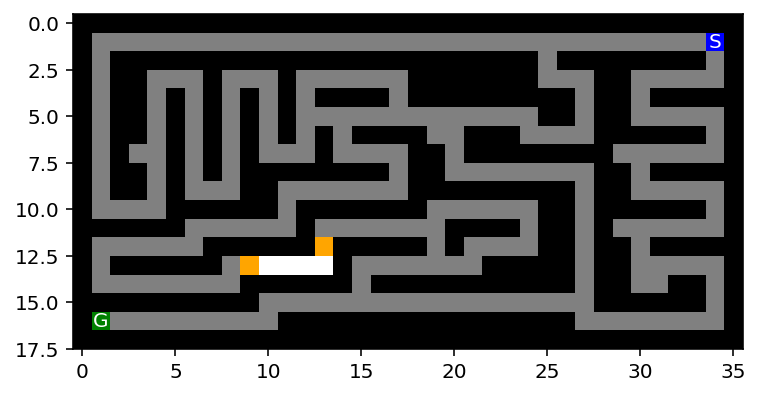

In [16]:
# run this code to reset maze color complex
maze = mh.parse_maze(maze_str)

node = breadth_first_search(maze, True)
# for node in node.get_path_from_root():
#     print(node)

In [17]:
# Depth First Search -- with 'reached'
def depth_first_search(problem, verbose = False):
    root = Node(pos = mh.find_pos(problem), parent=None, action=None, cost = 0)
    if mh.find_pos(problem, what='G') == root.pos:
        return root
    
    # for comparison data
    global num_nodes_expanded
    global max_tree_depth
    global max_nodes_in_mem
    global max_frontier_size
    
    cycle_checking = {}
    frontier_stack = []
    
    frontier_stack.append(root)
    cycle_checking[root.pos] = True
    
    max_tree_depth += 1
    
    while frontier_stack:
        node = frontier_stack.pop()
        
        if node.pos != mh.find_pos(problem):
            problem[node.pos[0], node.pos[1]] = '.'
            
        if mh.find_pos(problem, what='G') == node.pos:
            return node
        
        frontier_helper = 0
        memory_helper = len(frontier_stack)
        for child in expand(problem, node):
            num_nodes_expanded += 1
            memory_helper += 1
            frontier_helper += 1
            
            s = child.pos
            # print("location of child: ", s)
            if s == mh.find_pos(problem, what = 'G'):
                if verbose:
                    mh.show_maze(problem)
                return child
            if not s in cycle_checking:
                cycle_checking[s] = True
                frontier_stack.append(child)
                problem[s[0], s[1]] = 'F'
            else:
                child = None
        
        max_tree_depth += 1
        if frontier_helper > max_frontier_size:
            max_frontier_size = frontier_helper
        if memory_helper > max_nodes_in_mem :
            max_nodes_in_mem = memory_helper
    if verbose:
        mh.show_maze(problem)
    return root

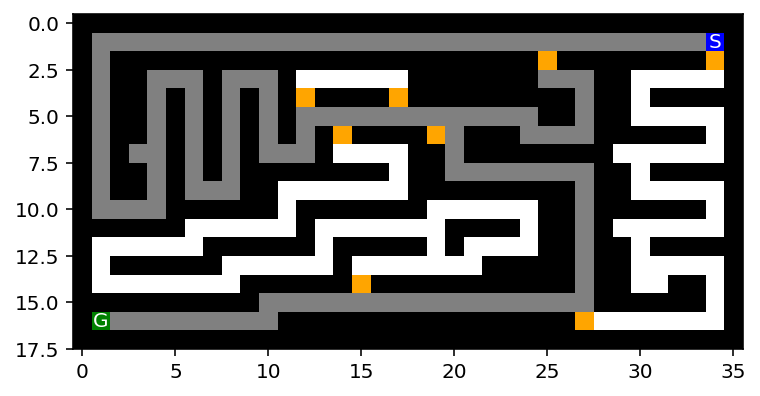

In [19]:
maze = mh.parse_maze(maze_str)

node = depth_first_search(maze, True)

# for node in node.get_path_from_root():
#     print(node)

How does BFS and DFS deal with loops (cycles)?

Using the *reached* structure, both BFS and DFS deal with loops in a similar fashion. By keeping a dictionary (hashmap) of visited node positions, both BFS and DFS can detect and avoid entering a cycle with constant time lookup time.

Are your implementations complete and optimal? Explain why. What is the time and space complexity of each of **your** implementations?

### Breadth First Search
BFS is complete and optimal. It is complete because it branches out into every possible frontier and step-by-step increments toward unexplored territory and it explores every possible route (even if they end up being a dead-end or a loop) until it finishes. It is optimal because since every branch is being explored, the route with the shortest path to the goal state will always be reached before any other route to the goal state can be realized. With the cost being uniform, it is guaranteed to be optimal. The time complexity for BFS is O(branching factor^depth). The space complexity of BFS is the same and is O(branching factor^depth)

### Depth First Search
DFS is complete but is not optimal. It is complete as it will ultimately explore all possible branches of state paths until the goal state is reached, albeit slower and less efficient than BFS. It is not optimal as there is absolutely no guarantee that the shortest path will be the solution. In fact, it will simply stop when a solution is reached without regard for the shortest path. The solution for DFS is only optimal when the transition functions that lead to the shortes path solution is one that is explored first, but there is no guarantee of this. The worst-case time complexity of DFS is O(branching factor^(maximum depth of tree)) which will be slower than BFS if maximum depth m is much bigger than depth d but if there exist shallow solutions that get explored DFS can potentially be faster than BFS. The space complexity of DFS is O(branching factor * maximum depth of tree) if no *reached* data structure is used. If *reached* structure is used, the space complexity becomes O(maximum depth * (branching factor)^depth).

## Task 3: Informed search: Implement greedy best-first search and A* search  [20 Points]

You can use the map to estimate the distance from your current position to the goal using the Manhattan distance (see https://en.wikipedia.org/wiki/Taxicab_geometry) as a heuristic function. Both algorithms are based on Best-First search which requires only a small change from the BFS algorithm you have already implemented (see textbook/slides). 

In [10]:
# this heuristic function is used for both greedy best-first-search as well as A*
# for greedy best-first search, g(n) will simply be 0
def heuristic(problem, frontier_pqueue, path_cost):
    for node in frontier_pqueue:
        if not path_cost:   # greedy best-first
            node.heuristic = abs(node.pos[0] - mh.find_pos(problem, what='G')[0]) + abs(node.pos[1] - mh.find_pos(problem, what='G')[1])
        else:               # A*
            h_n = abs(node.pos[0] - mh.find_pos(problem, what='G')[0]) + abs(node.pos[1] - mh.find_pos(problem, what='G')[1])
            g_n = node.cost
            
            node.heuristic = h_n + g_n
    
    frontier_pqueue.sort(key=operator.attrgetter('heuristic'))

In [20]:
# Greedy Best First Search
def best_first_search(problem, heuristic, verbose=False):
    root = Node(pos = mh.find_pos(problem), parent=None, action=None, cost=0, heuristic=0)
    
    # for comparison data
    global num_nodes_expanded
    global max_tree_depth
    global max_nodes_in_mem
    global max_frontier_size
    
    frontier_pqueue = [root]
    reached_dict = {}
    reached_dict[root.pos] = root
    
    max_tree_depth += 1
    
    while frontier_pqueue:
        node = frontier_pqueue.pop(0)
        
        if node.pos != mh.find_pos(problem):
            problem[node.pos[0], node.pos[1]] = '.'
        
        if node.pos == mh.find_pos(problem, what='G'):
            return node
        
        frontier_helper = 0
        memory_helper = len(frontier_pqueue)
        for child in expand(problem, node):
            num_nodes_expanded += 1
            memory_helper += 1
            frontier_helper += 1
            
            s = child.pos
            if s == mh.find_pos(problem, what='G'):
                if verbose:
                    mh.show_maze(problem)
                return child
            if (not s in reached_dict) or child.cost < reached_dict[s].cost:
                reached_dict[s] = child
                frontier_pqueue.append(child)
                
                problem[s[0], s[1]] = 'F'
        
        max_tree_depth += 1
        if frontier_helper > max_frontier_size:
            max_frontier_size = frontier_helper
        if memory_helper > max_nodes_in_mem :
            max_nodes_in_mem = memory_helper
        
        heuristic(problem, frontier_pqueue, path_cost=False)
    if verbose:
        mh.show_maze(problem)
    
    return root

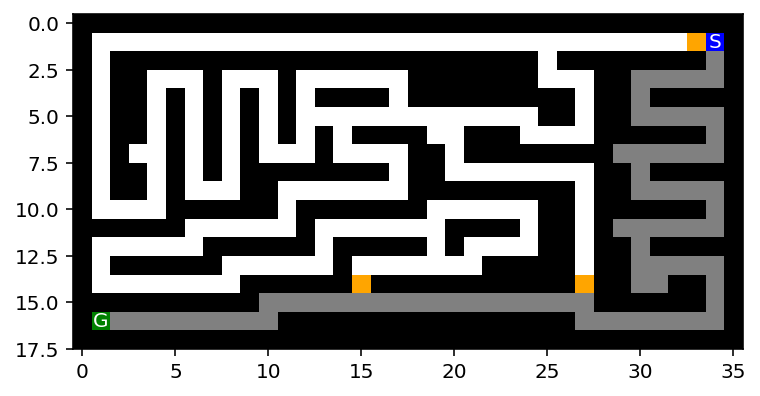

In [21]:
maze = mh.parse_maze(maze_str)

node = best_first_search(maze,heuristic, True)

In [22]:
# A* Search
def a_star(problem, heuristic, verbose=False):
    root = Node(pos = mh.find_pos(problem), parent=None, action=None, cost=0, heuristic=0)
    
    # for comparison data
    global num_nodes_expanded
    global max_tree_depth
    global max_nodes_in_mem
    global max_frontier_size
    
    frontier_pqueue = [root]
    reached_dict = {}
    reached_dict[root.pos] = root
    
    max_tree_depth += 1
    
    while frontier_pqueue:
        node = frontier_pqueue.pop(0)
        
        if node.pos != mh.find_pos(problem):
            problem[node.pos[0], node.pos[1]] = '.'
        
        if node.pos == mh.find_pos(problem, what='G'):
            return node
        
        frontier_helper = 0
        memory_helper = len(frontier_pqueue)
        for child in expand(problem, node):
            num_nodes_expanded += 1
            memory_helper += 1
            frontier_helper += 1
            
            s = child.pos
            if s == mh.find_pos(problem, what='G'):
                if verbose:
                    mh.show_maze(problem)
                return child
            if (not s in reached_dict) or child.cost < reached_dict[s].cost:
                reached_dict[s] = child
                frontier_pqueue.append(child)
                
                problem[s[0], s[1]] = 'F'
                
        max_tree_depth += 1
        if frontier_helper > max_frontier_size:
            max_frontier_size = frontier_helper
        if memory_helper > max_nodes_in_mem :
            max_nodes_in_mem = memory_helper
        
        heuristic(problem, frontier_pqueue, path_cost=True)
    if verbose:
        mh.show_maze(problem)
        
    return root

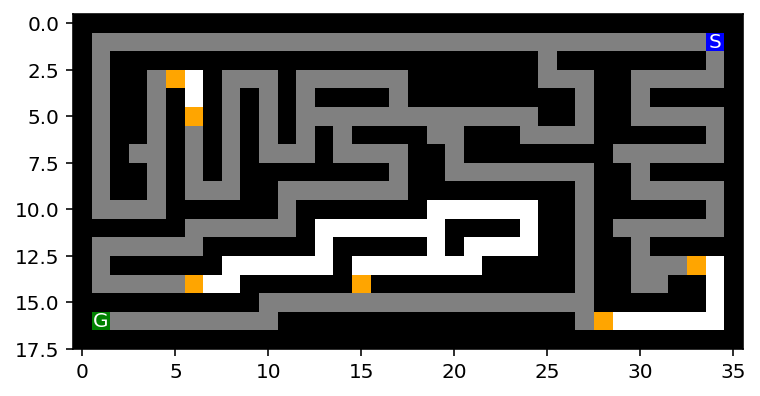

In [23]:
maze = mh.parse_maze(maze_str)

node = a_star(maze, heuristic, True)

Are your implementations complete and optimal? What is the time and space complexity?

### Greedy Best First Search
GBFS is complete in finite spaces and is not optimal. The time complexity of GBFS is O((branching factor)^(maximum depth)) at the worst case (i.e many routes that are misleading that lead frontiers close to the goal state but are ultimately deadends or divert out) and O((branching factor) * (maximum depth of tree)) for best case scenario. The best case scenario is when the heuristics are 100% accurate and lead the frontier to the goal state. The space complexity of GBFS is the same as the time complexity.

### A Star Search
A star search is complete and optimal given the heuristic is admissible. In my implementation, heuristics are admissible so this implementation of A star search is both complete and optimal. The time complexity of A star search is O((branching factor)^depth) at the worst case and O(number of nodes explored) at the best. The space complexity for A star search is the same as time complexity.

## Task 4: Comparison and discussion [20 Points] 

Run experiments to compare the implemented algorithms.

How to deal with issues:

* Your implementation returns unexpected results: Try to debug and fix the code. Visualizing the maze, the current path and the frontier after every step is very helpful. If the code still does not work, then mark the result with an asterisk (*) and describe the issue below the table.

* Your implementation cannot consistently solve a specific maze and ends up in an infinite loop:
    Debug. If it is a shortcoming of the algorithm/implementation, then put "N/A*" in the results table and describe why this is happening.

In [121]:
# f = open("small_maze.txt", "r")
# f = open("medium_maze.txt", "r")
# f = open("large_maze.txt", "r")    # this has only one solution!
# f = open("open_maze.txt", "r")
# f = open("empty_maze.txt", "r")
# f = open("empty_2_maze.txt", "r")
# f = open("wall_maze.txt", "r")
# f = open("loops_maze.txt", "r")
f = open("L_maze.txt", "r")

maze_str = f.read()
maze = mh.parse_maze(maze_str)

In [103]:
import pandas as pd

In [13]:
maze = mh.parse_maze(maze_str)

num_nodes_expanded = 0
max_tree_depth = 0
max_nodes_in_mem = 0
max_frontier_size = 0

df_bfs = []
df_dfs = []
df_gbfs = []
df_a_s = []

bfs = breadth_first_search(maze)
print("Breadth First Search")
df_bfs.append(bfs.cost)
df_bfs.append(num_nodes_expanded)
df_bfs.append(max_tree_depth)
df_bfs.append(max_nodes_in_mem)
df_bfs.append(max_frontier_size)

num_nodes_expanded = 0
max_tree_depth = 0
max_nodes_in_mem = 0
max_frontier_size = 0

dfs = depth_first_search(maze)
print("Depth First Search")
df_dfs.append(dfs.cost)
df_dfs.append(num_nodes_expanded)
df_dfs.append(max_tree_depth)
df_dfs.append(max_nodes_in_mem)
df_dfs.append(max_frontier_size)

num_nodes_expanded = 0
max_tree_depth = 0
max_nodes_in_mem = 0
max_frontier_size = 0

gbfs = best_first_search(maze, heuristic)
print("Best First Search")
df_gbfs.append(gbfs.cost)
df_gbfs.append(num_nodes_expanded)
df_gbfs.append(max_tree_depth)
df_gbfs.append(max_nodes_in_mem)
df_gbfs.append(max_frontier_size)

num_nodes_expanded = 0
max_tree_depth = 0
max_nodes_in_mem = 0
max_frontier_size = 0

a_s = a_star(maze, heuristic)
print("A Star Search")
df_a_s.append(a_s.cost)
df_a_s.append(num_nodes_expanded)
df_a_s.append(max_tree_depth)
df_a_s.append(max_nodes_in_mem)
df_a_s.append(max_frontier_size)

Breadth First Search
Depth First Search
Best First Search
A Star Search


Complete the following table for each maze.

__Small maze__

| algorithm | path cost | # of nodes expanded | max tree depth | max # of nodes in memory | max frontier size |
|-----------|-----------|----------------|----------------|---------------|-------------------|
| BFS       |      19     |     183           |       90         |        9       |            3       |
| DFS       |    37       |         78       |         37       |     8          |            3       |
| GBS       |    29       |         80       |         39       |       6        |            3       |
| A*        |      19     |          111      |         53       |        9       |           3        |

__Medium maze__

| algorithm | path cost | # of nodes expanded | max tree depth | max # of nodes in memory | max frontier size |
|-----------|-----------|----------------|----------------|---------------|-------------------|
| BFS       |      68   |     546        |        267     |    10          |         3          |
| DFS       |      130     |    296            |     144           |     10          |           3        |
| GBS       |      74     |       159         |       78         |       5        |         3          |
| A*        |       68    |       454         |       222         |        9       |         3          |

__Large maze__

| algorithm | path cost | # of nodes expanded | max tree depth | max # of nodes in memory | max frontier size |
|-----------|-----------|----------------|----------------|---------------|-------------------|
| BFS       |    210       |      1236          |      617          |         9      |          4         |
| DFS       |      210     |       811         |        387        |       40        |          4         |
| GBS       |     210      |        951        |        466        |       22        |          4         |
| A*        |    210       |         1104       |         549       |        13       |           4        |

In [108]:
cols = ['path cost', '# of nodes expanded', 'max tree depth', 'max # of nodes in memory', 'max frontier size']
df = pd.DataFrame([df_bfs], columns=cols)
df2 = pd.DataFrame([df_dfs], columns=cols)
df3 = pd.DataFrame([df_gbfs], columns=cols)
df4 = pd.DataFrame([df_a_s], columns=cols)

frames = [df, df2, df3, df4]
result = pd.concat(frames)
result.index = ['BFS', 'DFS', 'GBFS', 'A Star']
print("open maze")
result

open maze


,path cost,# of nodes expanded,max tree depth,max # of nodes in memory,max frontier size
BFS,54,2508,679,28,4
DFS,158,1141,315,153,4
GBFS,68,292,89,66,4
A Star,54,1981,534,28,4


In [111]:
cols = ['path cost', '# of nodes expanded', 'max tree depth', 'max # of nodes in memory', 'max frontier size']
df = pd.DataFrame([df_bfs], columns=cols)
df2 = pd.DataFrame([df_dfs], columns=cols)
df3 = pd.DataFrame([df_gbfs], columns=cols)
df4 = pd.DataFrame([df_a_s], columns=cols)

frames = [df, df2, df3, df4]
result = pd.concat(frames)
result.index = ['BFS', 'DFS', 'GBFS', 'A Star']
print("empty maze")
result

empty maze


,path cost,# of nodes expanded,max tree depth,max # of nodes in memory,max frontier size
BFS,14,335,92,14,4
DFS,34,129,36,38,4
GBFS,14,56,14,28,4
A Star,14,248,62,33,4


In [114]:
cols = ['path cost', '# of nodes expanded', 'max tree depth', 'max # of nodes in memory', 'max frontier size']
df = pd.DataFrame([df_bfs], columns=cols)
df2 = pd.DataFrame([df_dfs], columns=cols)
df3 = pd.DataFrame([df_gbfs], columns=cols)
df4 = pd.DataFrame([df_a_s], columns=cols)

frames = [df, df2, df3, df4]
result = pd.concat(frames)
result.index = ['BFS', 'DFS', 'GBFS', 'A Star']
print("empty maze 2")
result

empty maze 2


,path cost,# of nodes expanded,max tree depth,max # of nodes in memory,max frontier size
BFS,14,334,92,15,4
DFS,34,125,34,41,4
GBFS,14,55,14,28,4
A Star,14,247,62,33,4


In [117]:
cols = ['path cost', '# of nodes expanded', 'max tree depth', 'max # of nodes in memory', 'max frontier size']
df = pd.DataFrame([df_bfs], columns=cols)
df2 = pd.DataFrame([df_dfs], columns=cols)
df3 = pd.DataFrame([df_gbfs], columns=cols)
df4 = pd.DataFrame([df_a_s], columns=cols)

frames = [df, df2, df3, df4]
result = pd.concat(frames)
result.index = ['BFS', 'DFS', 'GBFS', 'A Star']
print("wall maze")
result

wall maze


,path cost,# of nodes expanded,max tree depth,max # of nodes in memory,max frontier size
BFS,14,291,85,13,4
DFS,20,70,21,24,4
GBFS,14,56,14,28,4
A Star,14,204,55,33,4


In [120]:
cols = ['path cost', '# of nodes expanded', 'max tree depth', 'max # of nodes in memory', 'max frontier size']
df = pd.DataFrame([df_bfs], columns=cols)
df2 = pd.DataFrame([df_dfs], columns=cols)
df3 = pd.DataFrame([df_gbfs], columns=cols)
df4 = pd.DataFrame([df_a_s], columns=cols)

frames = [df, df2, df3, df4]
result = pd.concat(frames)
result.index = ['BFS', 'DFS', 'GBFS', 'A Star']
print("loops maze")
result

loops maze


,path cost,# of nodes expanded,max tree depth,max # of nodes in memory,max frontier size
BFS,23,181,70,11,4
DFS,27,68,29,13,3
GBFS,23,208,76,13,4
A Star,23,156,58,9,4


In [123]:
cols = ['path cost', '# of nodes expanded', 'max tree depth', 'max # of nodes in memory', 'max frontier size']
df = pd.DataFrame([df_bfs], columns=cols)
df2 = pd.DataFrame([df_dfs], columns=cols)
df3 = pd.DataFrame([df_gbfs], columns=cols)
df4 = pd.DataFrame([df_a_s], columns=cols)

frames = [df, df2, df3, df4]
result = pd.concat(frames)
result.index = ['BFS', 'DFS', 'GBFS', 'A Star']
print("L maze")
result

L maze


,path cost,# of nodes expanded,max tree depth,max # of nodes in memory,max frontier size
BFS,14,481,135,21,4
DFS,58,252,75,58,4
GBFS,20,79,23,24,4
A Star,14,151,41,25,4


Present the results as using charts (see [Python Code Examples/charts and tables](../Python_Code_Examples/charts_and_tables.ipynb)). 

In [84]:
bfs_cost = [19, 68, 210]
dfs_cost = [37, 130, 210]
gbs_cost = [29, 74, 210]
a_s_cost = [19, 68, 210]

bfs_expanded = [183, 546, 1236]
dfs_expanded = [78, 296, 811]
gbs_expanded = [80, 159, 951]
a_s_expanded = [111, 454, 1104]

bfs_depth = [90, 267, 617]
dfs_depth = [37, 144, 387]
gbs_depth = [39, 78, 466]
a_s_depth = [53, 222, 549]

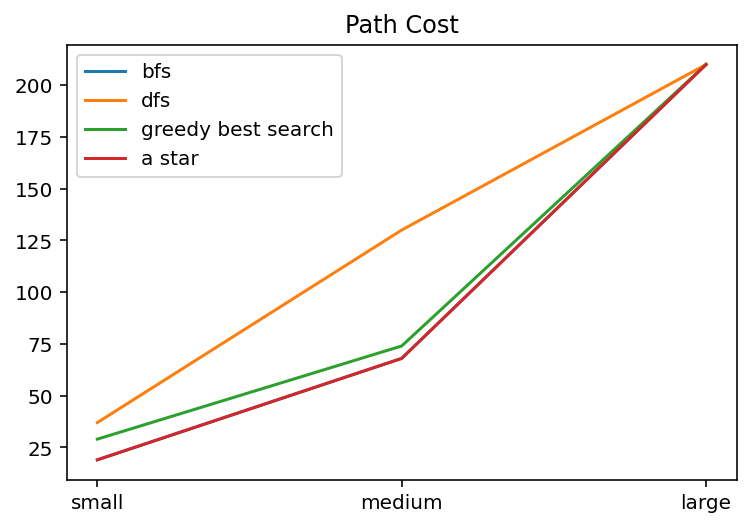

In [81]:
import matplotlib.pyplot as plt
x = ['small', 'medium', 'large']
default_x_ticks = range(len(x))
plt.xticks(default_x_ticks, x)

plt.title("Path Cost")
plt.plot(default_x_ticks, bfs_cost, label="bfs")
plt.plot(default_x_ticks, dfs_cost, label="dfs")
plt.plot(default_x_ticks, gbs_cost, label="greedy best search")
plt.plot(default_x_ticks, a_s_cost, label="a star")

plt.legend()
plt.show()

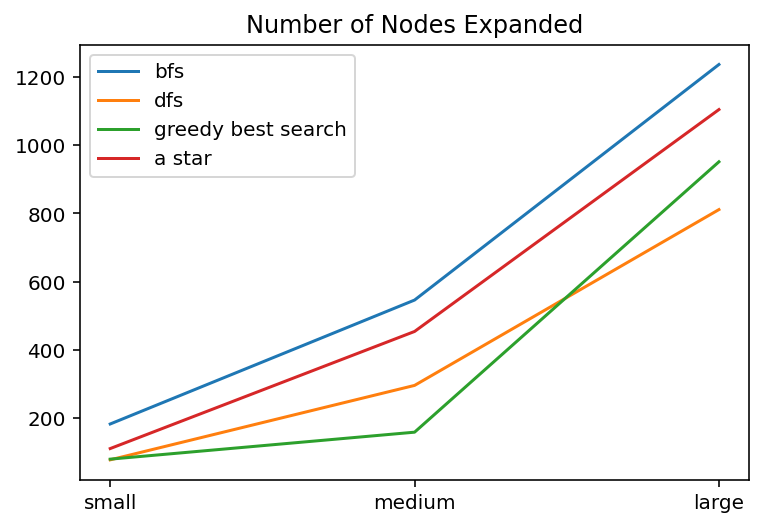

In [86]:
x = ['small', 'medium', 'large']
default_x_ticks = range(len(x))
plt.xticks(default_x_ticks, x)

plt.title("Number of Nodes Expanded")
plt.plot(default_x_ticks, bfs_expanded, label="bfs")
plt.plot(default_x_ticks, dfs_expanded, label="dfs")
plt.plot(default_x_ticks, gbs_expanded, label="greedy best search")
plt.plot(default_x_ticks, a_s_expanded, label="a star")

plt.legend()
plt.show()

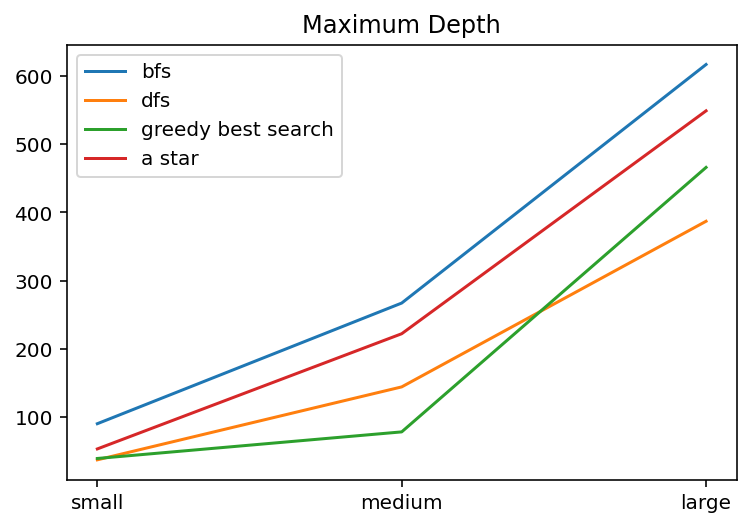

In [87]:
x = ['small', 'medium', 'large']
default_x_ticks = range(len(x))
plt.xticks(default_x_ticks, x)

plt.title("Maximum Depth")
plt.plot(default_x_ticks, bfs_depth, label="bfs")
plt.plot(default_x_ticks, dfs_depth, label="dfs")
plt.plot(default_x_ticks, gbs_depth, label="greedy best search")
plt.plot(default_x_ticks, a_s_depth, label="a star")

plt.legend()
plt.show()

Discuss the most important lessons you have learned from implementing the different search strategies. 

All four search algorithms implemented are very similar to one another in terms of the implementations with few but very important and decisive tweaks that make them behave completely differently. For example, greedy best first search and a_star search are exactly the same except one simple tweak in the heuristic function that results in completely different performance measures as well as a difference in optimality. This was unintuitive for me to understand at first as I expected these wildly different algorithms to have completey different implementations but ultimately shed light on the fact that these small logical adjustments make all the difference in these algorithms. I didn't really have the tree data structure in mind as I was implementing these algorithms but rather used the maze layout to derive my thinking process. This also helped me immensely as visualizing tree nodes as maze frontiers and state transitions as maze paths helped me to intuitively understand what I was doing.

## Graduate student advanced task: IDS and Multiple goals [10 Points]

__Undergraduate students:__ This is a bonus task you can attempt if you like [+5 Bonus Points].

Create a few mazes with multiple goals by adding one or two more goals to the medium size maze.
Solve the maze with your implementations for DFS, BFS, and implement in addition IDS (iterative deepening search using DFS). 

Run experiments to show which implementations find the optimal solution and which do not. Discuss why that is the case.

In [139]:
# f = open("medium_maze.txt", "r")
# f = open("medium_maze2.txt", "r")
# f = open("medium_maze3.txt", "r")
f = open("medium_maze4.txt", "r")
maze_str = f.read()
maze = mh.parse_maze(maze_str)

In [137]:
bfs = breadth_first_search(maze, verbose=False)

In [141]:
dfs = depth_first_search(maze, verbose=False)

In [130]:
def depth_limited_search(problem, l):
    root = Node(pos = mh.find_pos(problem), parent=None, action=None, cost=0)
    frontier_stack = [root]
    result = Node(pos = mh.find_pos(problem), parent=None, action='F', cost=0)
    
    reached_dict = {}
    reached_dict[root.pos] = root
    
    while frontier_stack:
        node = frontier_stack.pop()
        if node.pos == mh.find_pos(problem, what='G'):
            return node
        if node.cost > l:
            result = Node(pos = mh.find_pos(problem), parent=None, action='C', cost=0)
        elif not node in reached_dict:
            for child in expand(problem,node):
                frontier_stack.append(child)
                reached_dict[child.pos] = child
    return result

In [126]:
def iterative_deepening_search(problem):
    depth = 0
    while True:
        result = depth_limited_search(problem, depth)
        depth += 1
        
        if result.action != 'C':
            return result

In [ ]:
ids = iterative_deepening_search(maze)

It was seen that both BFS and DFS are *capable* of finding the optimal solution. DFS, despite not having the guarantee of finding the optimal solution, was in fact able to find it when certain conditions were met. With more than one goal in the maze, DFS was inherently more likely to find the optimal solution and was actually more efficient than BFS in a few mazes. With that being said, DFS is of course not guaranteed to find the optimal solution and will not ever find the optimal solution if the maze is constructed in such a way that DFS cannot find an optimal solution. BFS, on the other hand, with its guarantee of finding the optimal solution, was able to find the optimal solution in every maze with multiple goals. However, because there are multiple goals with some being in shallow depths, DFS outperformed BFS in a few occasions. As for IDS, I was unfortunately not able to get the algorithm to finish running in a reasonable amount of time. IDS inherently is slower than BFS by trading bad space complexity for bad time complexity. However, it is still possible that my algorithm was not efficient enough.

## More advanced tasks to think about

Instead of defining each square as a state, use only intersections as states. Now the storage requirement is reduced, but the path length between two intersections can be different. If we use total path length measured as the number of squares as path cost, how can we make sure that BFS and iterative deepening search is optimal? Change the code to do so.

In [18]:
# Your code/answer goes here

Modify your A* search to add weights (see text book) and explore how different weights influence the result.

In [19]:
# Your code/answer goes here

What happens if the agent does not know the layout of the maze in advance (i.e., faces an unkown, only partially observable environment)? How does the environment look then (PEAS description)? How would you implement a rational agent to solve the maze? What if the agent still has a GPS device to tell the distance to the goal?

In [20]:
# Your code/answer goes here